In [1]:
# %load ../util.py
import csv
import json
import os
import pickle

import pandas as pd
from sklearn.model_selection import train_test_split


class Utils:

    def read_json(self, filename):
        """
        This method loads a json from a file
        :param filename:
        :return: a json file
        """
        resources = {}
        if filename:
            with open(filename, 'r') as file:
                resources = json.load(file)
        return resources

    def write_json_to_directory(self, json_object, file_name, directory="resources"):
        """
        This method writes a python object to a json file
        """
        self.make_directory_if_not_exists(directory)
        filename = os.path.join(directory, file_name)
        with open(filename, 'w') as outfile:
            json.dump(json_object, outfile)

    @staticmethod
    def write_to_directory(path, content):
        """
        This method writes a python object to a json file
        """
        with open(path, "w") as text_file:
            print(content, file=text_file)

    @staticmethod
    def make_directory_if_not_exists(directory):
        """
        this method creates a directory if it does not exists
        :param directory:
        """
        if not os.path.exists(directory):
            os.makedirs(directory)

    @staticmethod
    def read_csv(filename):
        """
        This method reads a CSV file to a list
        :param filename:
        :return: a list containing elements per line of CSV
        """
        with open(filename, 'r') as a_file:
            return list(csv.reader(a_file))

    @staticmethod
    def read_data_to_dataframe(path):
#         print(os.path.abspath(__file__))
        return pd.read_csv(path)

    @staticmethod
    def split_data(df):
        data = df.to_numpy()
        X = data[:, :-1]
        y = data[:, -1]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        return X_train, X_test, y_train, y_test

    @staticmethod
    def read_pickle_from_file(file_name):
        with open(file_name, 'rb') as input:
            return pickle.load(input)



In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# from util import Utils
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
class LiwcProcessor:
    @staticmethod
    def read_data():
        util = Utils()
        profile_df = util.read_data_to_dataframe("../../data/Train/Profile/Profile.csv")
        liwc_df = util.read_data_to_dataframe("../../data/Train/Text/liwc.csv")
        liwc_df.rename(columns={'userId': 'userid'}, inplace=True)
        merged_df = pd.merge(profile_df, liwc_df, on='userid', how='left')
        return merged_df.filter(['WC','WPS','Sixltr','Dic','Numerals','funct','pronoun','ppron','i','we','you','shehe',
                                 'they','ipron','article','verb','auxverb','past','present','future','adverb','preps',
                                 'conj','negate','quant','number','swear','social','family','friend','humans','affect',
                                 'posemo','negemo','anx','anger','sad','cogmech','insight','cause','discrep','tentat',
                                 'certain','inhib','incl','excl','percept','see','hear','feel','bio','body','health',
                                 'sexual','ingest','relativ','motion','space','time','work','achieve','leisure','home',
                                 'money','relig','death','assent','nonfl','filler','Period','Comma','Colon','SemiC',
                                 'QMark','Exclam','Dash','Quote','Apostro','Parenth','OtherP','AllPct'], axis=1)

    @staticmethod
    def plot_features(df):
        for col in df.columns:
            # df[col].hist()
            sns.distplot(df[col])
            plt.show()



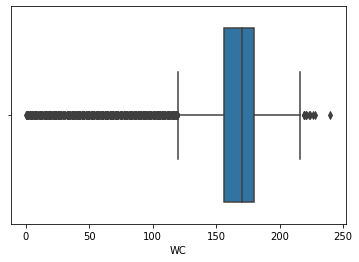

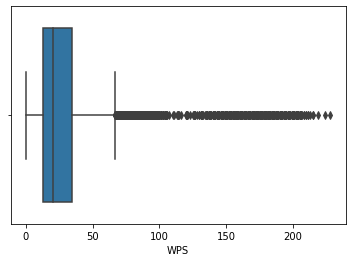

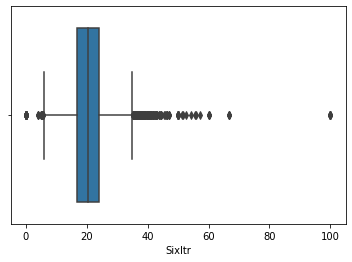

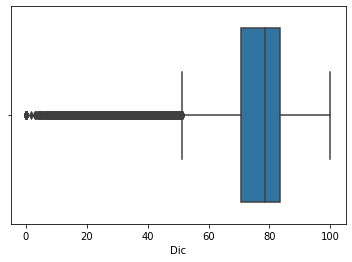

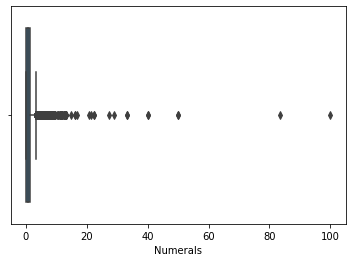

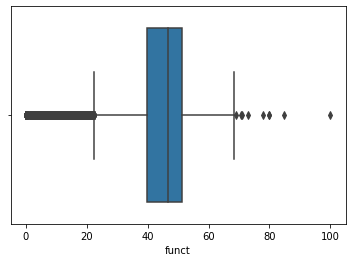

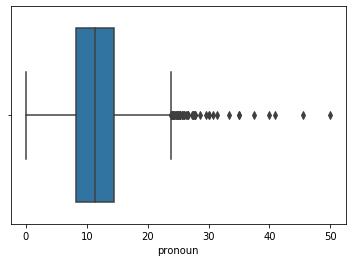

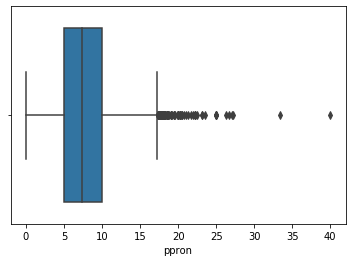

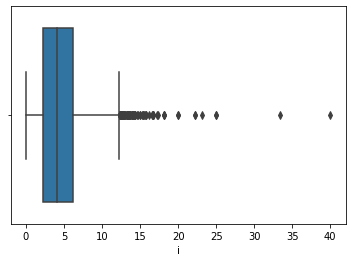

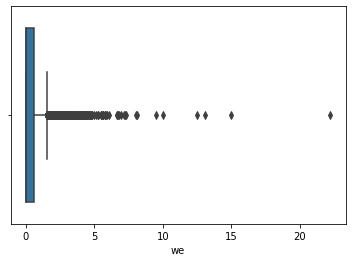

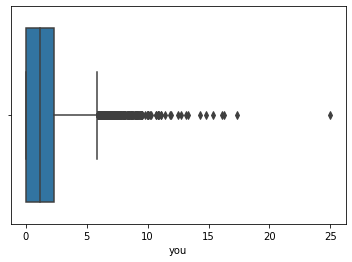

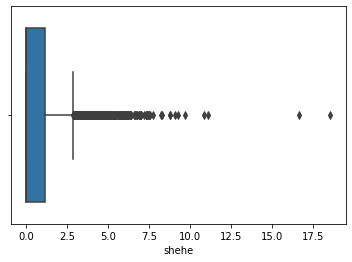

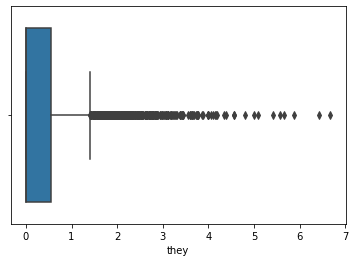

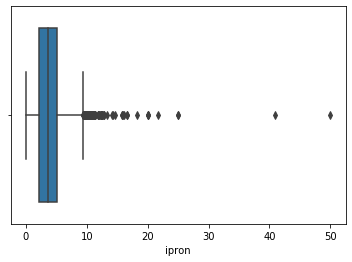

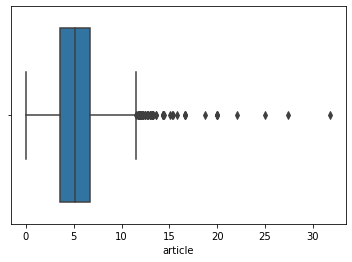

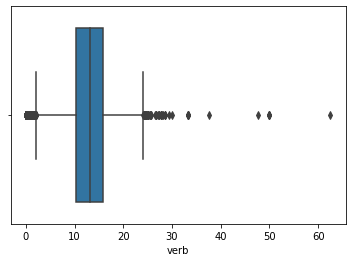

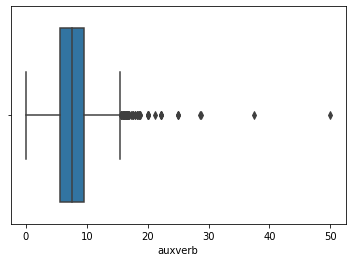

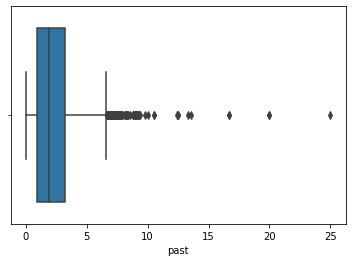

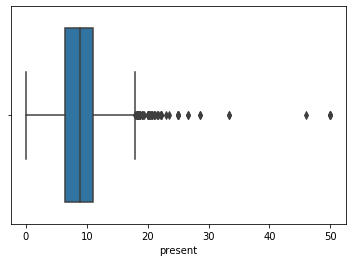

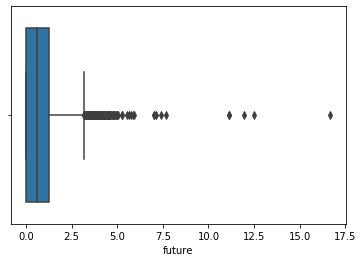

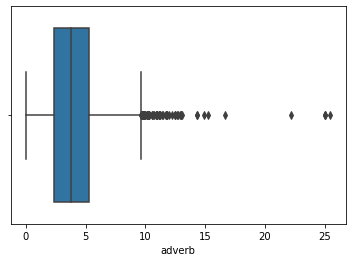

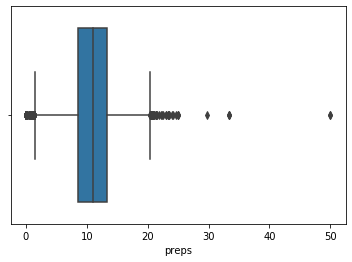

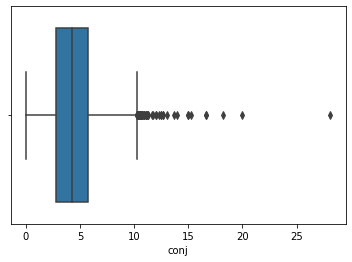

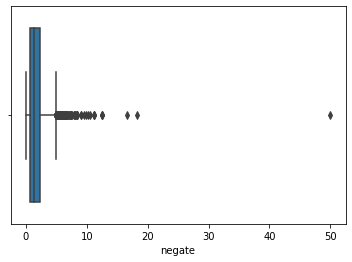

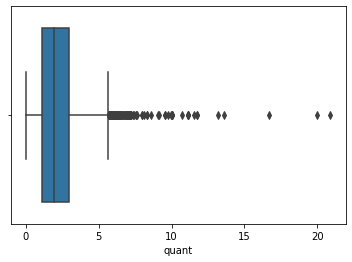

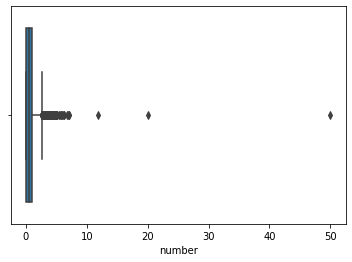

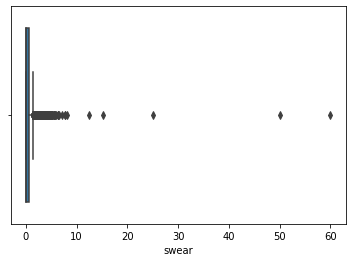

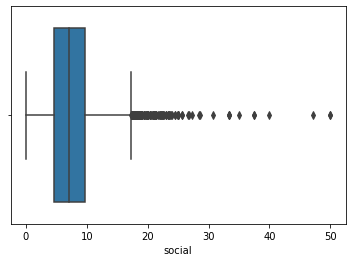

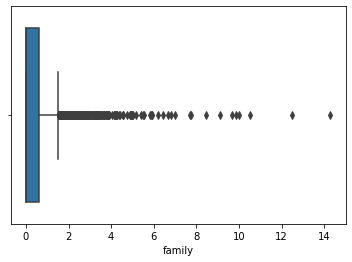

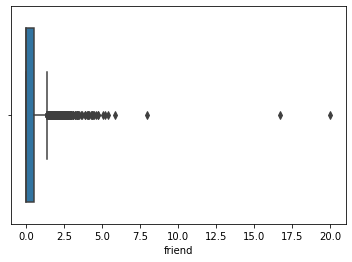

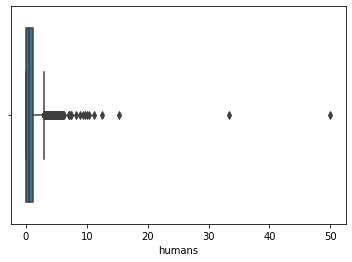

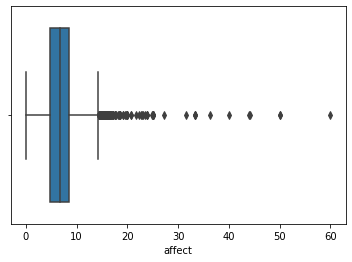

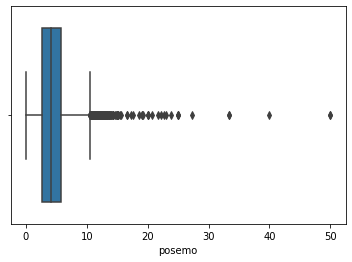

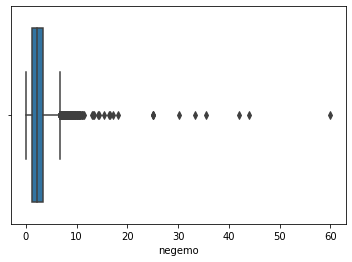

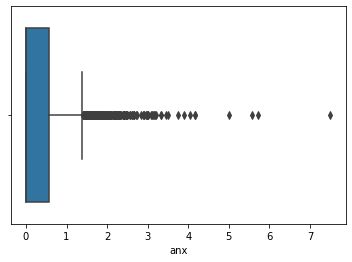

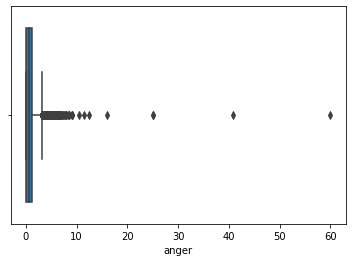

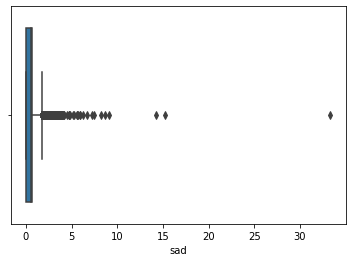

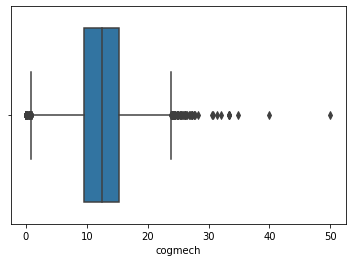

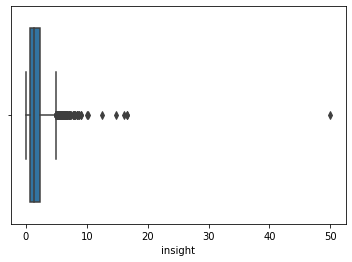

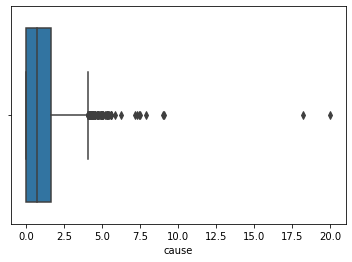

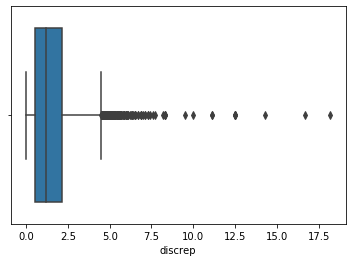

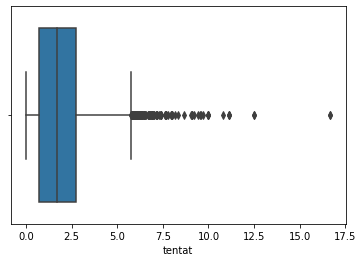

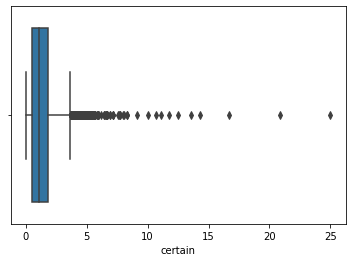

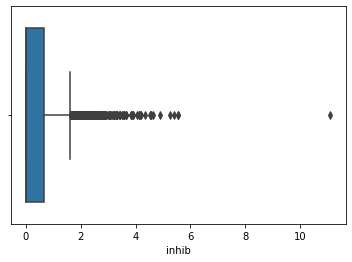

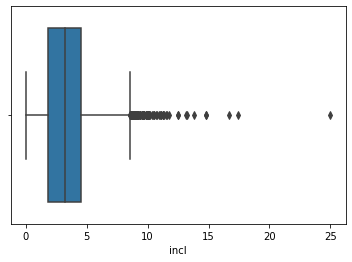

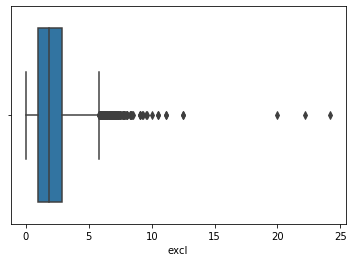

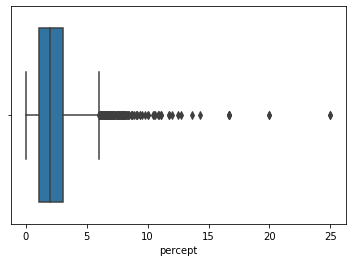

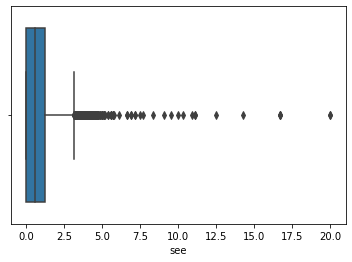

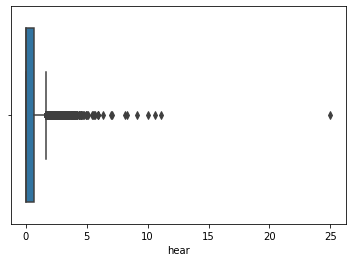

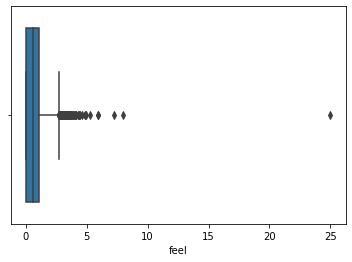

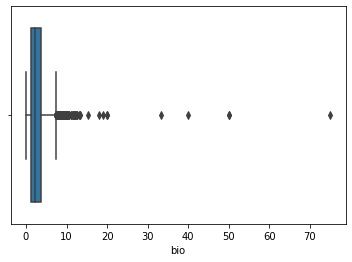

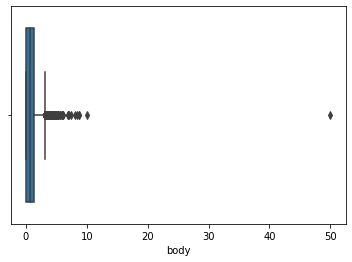

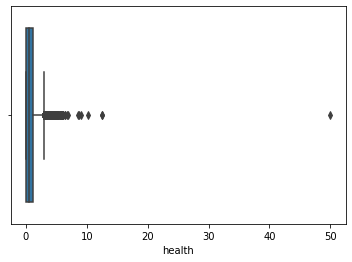

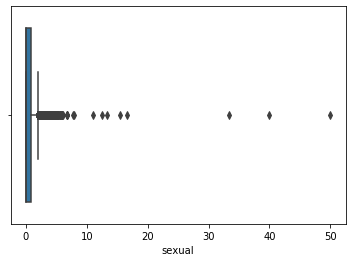

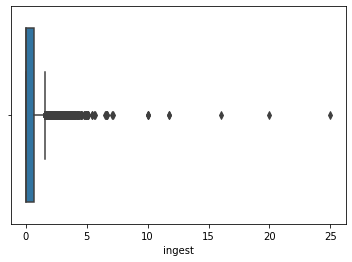

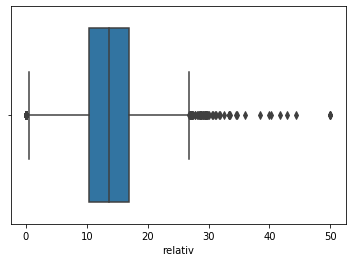

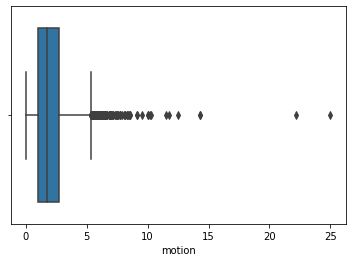

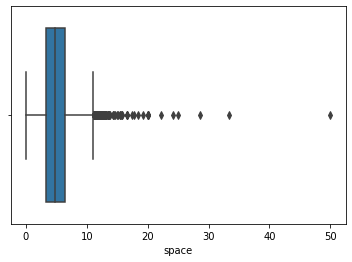

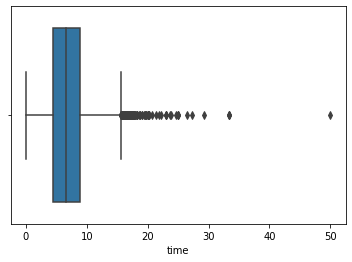

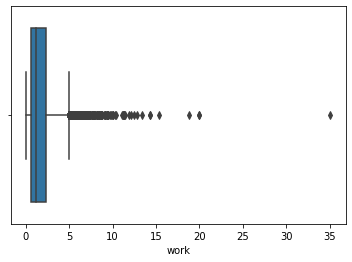

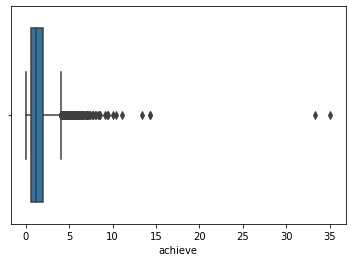

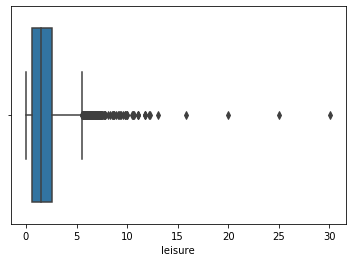

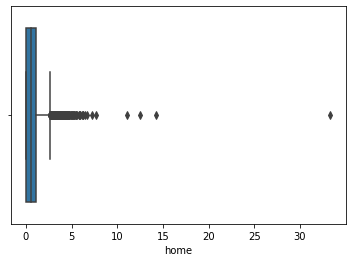

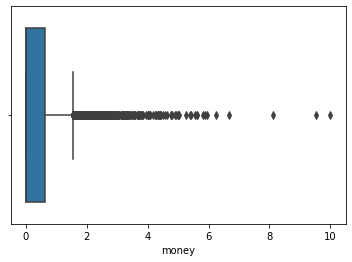

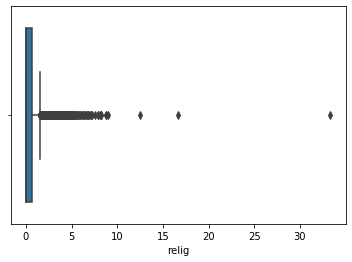

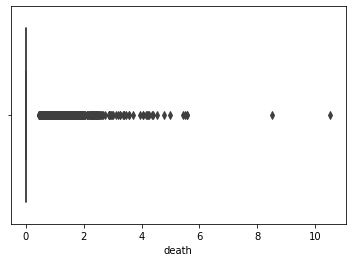

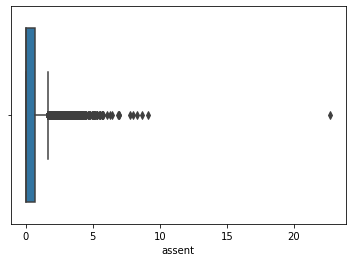

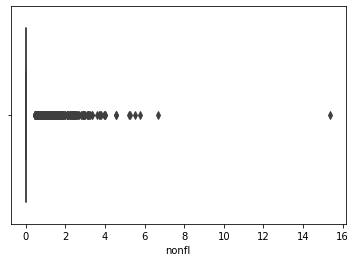

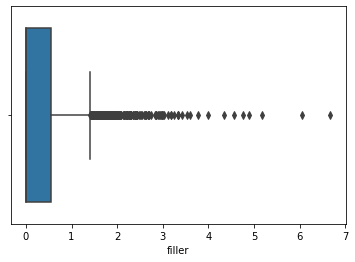

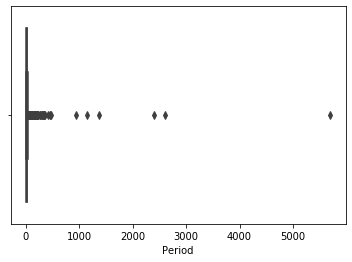

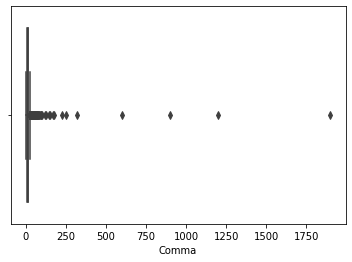

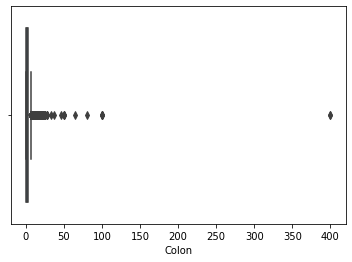

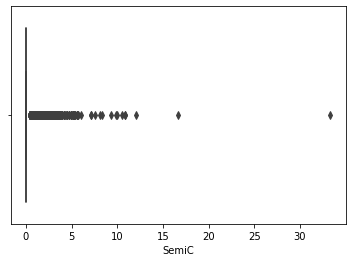

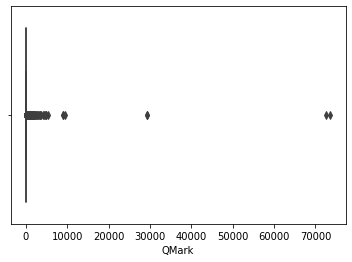

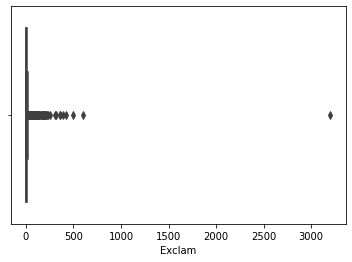

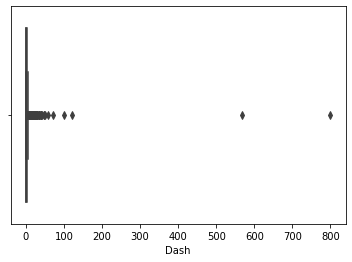

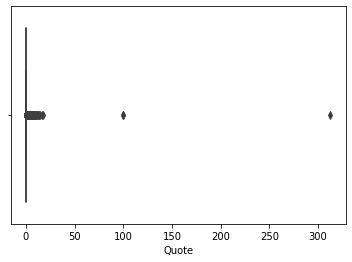

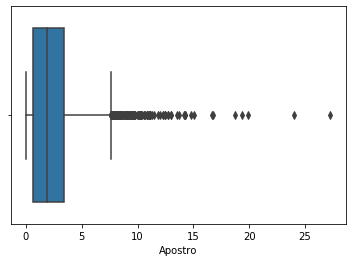

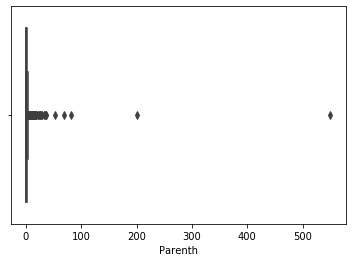

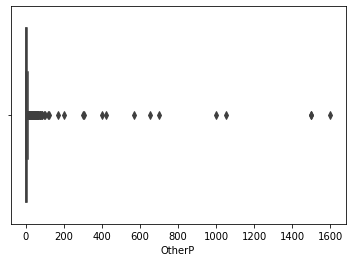

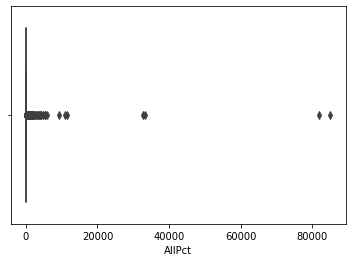

In [4]:
df = LiwcProcessor.read_data()
# LiwcProcessor.plot_features(df)
from sklearn import preprocessing
def transform(df):
    x = df.values
    scaler = preprocessing.StandardScaler()
    x_scaled = scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
#     for col in df.columns:
#         df[col] = np.log(df[col]+1)
def remove_outliers(df):
    for col in df.columns:
        data = df[col]
        upper_lim = data.mean() + data.std() * 1.5
        lower_lim = data.mean() - data.std() * 1.5
        df[col] = data[(data < upper_lim ) & (data > lower_lim)]
        
# remove_outliers(df)
transform(df)
def box_plot_features(df):
    for col in df.columns:
        sns.boxplot(df[col])
        plt.show()
        
box_plot_features(df)

from sklearn.decomposition import PCA
def plot_pca():
    pca = PCA()
    projected = pca.fit_transform(digits.data)
    plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.colorbar()

plot_pca()
    